### Imports

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt


TODOS:
- Do I have or need exp with veeery big number of k or max_bin_size? - maybe I have somewhere?
    - run the exp where I compare the probability of every paper citing! in colab? I need to transfer data
    - then take this data and 
- Comparison - mean vs mean? aggregate with mean before calculating the distance? Definitely, if I get random edges every time
- kolmogorov smirnov
- statistics like standard deviation
- other plots? Q-Q plot?



1. Zobaczyć aproksymację w paperze i implementacji ALE. W zależności: zadowolić się wynikami lub zacząć kminić skąd zgarnąć większe
Wykresy:
2. Boxplots/violinplots: 


Run ground truth on runpod 

Wykresy: 
- podwójne x dwa modele x dwa zbiory
- rozstrzał odpowiedzi na boxplocie
- wassertein (gdy będę miała groundtruth)

In [2]:
paths = {"CD1-E_no2 dataset, ALE method, GCN model": "C:/Users/ppaul/Documents/influence_on_ideas/data/CD1-E_no2/ALE_all_GCN_n_layers2_hidden_size256.csv",
        "CD1-E_no2 dataset, ALE method, GAT model": "C:/Users/ppaul/Documents/influence_on_ideas/data/CD1-E_no2/ALE_all_GAT_n_layers2_hidden_size256.csv", 
         "citations dataset, ALE method, GCN model": "C:/Users/ppaul/Documents/influence_on_ideas/data/citations/ALE_04.08_GCN_n_layers2_hidden_size256.csv",
         "citations dataset, ALE method, GAT model": "C:/Users/ppaul/Documents/influence_on_ideas/data/citations/ALE_04.08_GAT_n_layers2_hidden_size256.csv"}
#path_ale_gat = pd.read_csv("C:/Users/ppaul/Documents/influence_on_ideas/data/CD1-E_no2/ALE_GAT_n_layers2_hidden_size256.csv", names=['trial', 'k', 'max_bin_size', 'explanation_exact', 'time_exact', 'explanation_approximate', 'time_approximate'], header=None)


In [15]:
model = "GCN"
dataset = "CD1-E_no2"#"citations"#
df = pd.read_csv(
    paths[f"{dataset} dataset, ALE method, {model} model"],
    index_col=None,
)

In [17]:
df

,index,trial,k,max_bin_size,explanation_approximate,time_approximate,explanation_exact,time_exact
0,0,0,16,16,-0.029926,1.203323,-0.012712,16.023126
1,1,0,16,16,-0.010272,1.203323,-0.010108,16.023126
2,2,0,16,16,-0.007339,1.203323,0.002424,16.023126
3,3,0,16,16,-0.013909,1.203323,0.013199,16.023126
4,4,0,16,16,-0.031853,1.203323,0.004394,16.023126
...,...,...,...,...,...,...,...,...
1220,0,4,1024,1024,0.002731,1.408070,0.000158,1006.979571
1221,1,4,1024,1024,-0.001607,1.408070,0.000728,1006.979571
1222,2,4,1024,1024,0.003776,1.408070,0.001993,1006.979571
1223,3,4,1024,1024,0.002148,1.408070,0.003257,1006.979571


In [36]:
df.groupby('index')[['explanation_exact', 'explanation_approximate']].agg(["var"])['explanation_exact']['var']

index
0    0.000014
1    0.000035
2    0.000051
3    0.000062
4    0.000066
Name: var, dtype: float64

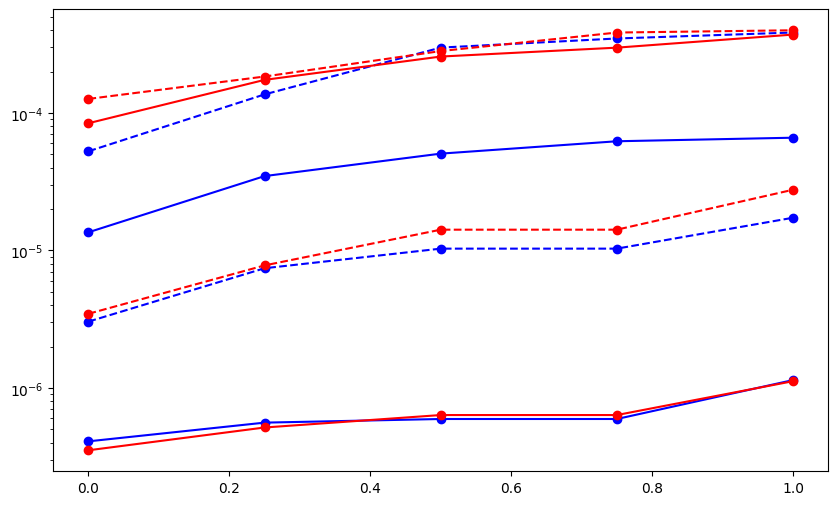

In [45]:
variance = {}
plt.figure(figsize=(10, 6))
for key, path in paths.items():
    colour = 'blue' if 'GCN' in key else 'red'
    try:
        df = pd.read_csv(
            path,
            index_col=None,
        )
        variance[key] = df.groupby('index')[['explanation_exact', 'explanation_approximate']].agg(["var"])
    except:
        df = pd.read_csv(
            path,
            names=['index', 'k', 'max_bin_size',  'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact'], 
            header=None, index_col=0)
        variance[key] = df.groupby('index')[['explanation_exact', 'explanation_approximate']].agg(["var"])
    plt.plot([0,0.25,0.5,0.75,1], variance[key]['explanation_exact']['var'], color=colour, marker='o', linestyle='-', label='GCN Exact')
    plt.plot([0,0.25,0.5,0.75,1], variance[key]['explanation_approximate']['var'], color=colour, marker='o', linestyle='--', label='GCN Approximate')
plt.yscale('log')
plt.show()

In [43]:
variance['citations dataset, ALE method, GAT model']

,explanation_exact,explanation_approximate
,var,var
index,,
0,3.523393e-07,0.000003
1,5.159985e-07,0.000008
2,6.356742e-07,0.000014
3,6.356742e-07,0.000014
4,1.120351e-06,0.000028


In [30]:
for key, value in reversed(variance.items()):
    
    print(key)
    print(value)
    print("\n\n\n")

# Create a line plot
plt.figure(figsize=(10, 6))

# Plotting GCN data
plt.plot(df.index, variance["CD1-E_no2 dataset, ALE method, GCN model"]['explanation_exact']['var'], color='blue', marker='o', linestyle='-', label='GCN Exact')
plt.plot(df.index, variance["CD1-E_no2 dataset, ALE method, GCN model"]['explanation_approximate']['var'], color='blue', marker='o', linestyle='--', label='GCN Approximate')

# Plotting GAT data
plt.plot(index, data["GAT"]["exact"]['var'], color='red', marker='s', linestyle='-', label='GAT Exact')
plt.plot(index, data["GAT"]["approximate"]['var'], color='red', marker='s', linestyle='--', label='GAT Approximate')

# Adding titles and labels
plt.title('Variance Comparison: Exact vs Approximate Explanations')
plt.xlabel('Index')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

citations dataset, ALE method, GAT model
      explanation_exact explanation_approximate
                    var                     var
index                                          
0          3.966736e-07                0.000004
1          5.736627e-07                0.000008
2          6.181822e-07                0.000015
3          6.181822e-07                0.000015
4          1.141610e-06                0.000028




citations dataset, ALE method, GCN model
      explanation_exact explanation_approximate
                    var                     var
index                                          
0          4.134958e-07                0.000003
1          5.656231e-07                0.000008
2          6.011005e-07                0.000010
3          6.011005e-07                0.000010
4          1.153342e-06                0.000017




CD1-E_no2 dataset, ALE method, GAT model
      explanation_exact explanation_approximate
                    var                     var
index

KeyError: 'var'

<Figure size 1000x600 with 0 Axes>

In [126]:

mod = df.apply(lambda x: x['k']*x['max_bin_size'], axis=1).sum()/5
gt = df.apply(lambda x: x['explanation_exact']*x['max_bin_size']*x['k']/mod,axis=1).groupby(['index']).sum()
#gt = df.groupby(['index']).mean()['explanation_exact']
ap = df.apply(lambda x: x['explanation_approximate']*x['max_bin_size']*x['k']/mod,axis=1).groupby(['index']).sum()#['explanation_approximate']
#print(np.vstack(df['explanation_exact'].apply(lambda x: np.array(x))).mean(axis=0))
#gt = df.loc[:, 'explanation_exact'].mean()
print(ap)
# df1024['trial'] = df1024.reset_index()['level_0'].apply(lambda x: math.floor(float(x)/5))
fig, (ax1, ax2) = plt.subplots(1, 2)
for (k, max_bin_size), group in (
    df.groupby(["k", "max_bin_size"])
):
    color_intensity = k + max_bin_size
    ax1.plot(
        group.reset_index()["index"].apply(lambda x: x / 4),
        group["explanation_exact"],
        label=f"k={k}, max_bin_size={max_bin_size}",
        color=(0, 0, 0, color_intensity / 2048),
        linewidth=2,
    )

    ax2.sharey(ax1)
    ax2.plot(
        group.reset_index()["index"].apply(lambda x: x / 4),
        group["explanation_approximate"],
        label=f"k={k}, max_bin_size={max_bin_size}",
        color=(0, 0, 0, color_intensity / 2048),
        linewidth=2,
    )

ax1.plot(
    [0, 0.25, 0.5, 0.75, 1],
    gt,
    color='red',
    linewidth=2,
)
ax2.plot(
    [0, 0.25, 0.5, 0.75, 1],
    gt,
    color='red',
    linewidth=2,
)
ax1.plot(
    [0, 0.25, 0.5, 0.75, 1],
    ap,
    color='blue',
    linewidth=2,
)
ax2.plot(
    [0, 0.25, 0.5, 0.75, 1],
    ap,
    color='blue',
    linewidth=2,
)

# Add labels and legend
ax1.set_title('Explanation Exact')
ax2.set_title('Explanation Approximate')
ax1.set_xlabel('Authors affiliated with private sector')
ax2.set_xlabel('Authors affiliated with private sector')
#TODO: Change to appropriate x-axis labelm dependent on the datset (in args)
ax1.set_ylabel('ALE')# TODO" change to method
#ax.set_yscale('log')
plt.suptitle(f'{dataset} dataset, {model} model')
# Show plot
plt.show()
#plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/citations/ALE_{model}_n_layers2_hidden_size256.png")#, format='eps')

KeyError: 'k'

1. bootstrapping
2. pareto frontier cost vs. quality. Quality: MSE? cost
3. unbiased estimate - check

Śmieszne testy czy gaussowski dla pojedynczego i
-> Czy dla każdego punktu średnia jest taka sama? t-test?

Ładne boxploty - jakie podpisy i tytuły żeby wszystko bylo jasne?


In [244]:
model = "GAT"
dataset = "CD1-E_no2"
df = pd.read_csv(
    f"C:/Users/ppaul/Documents/influence_on_ideas/data/{dataset}/ALE_runpod_{model}_n_layers2_hidden_size256.csv",
    names=[
        "index",
        "trial",
        "k",
        "max_bin_size",
        "explanation_approximate",
        "time_approximate",
        "explanation_exact",
        "time_exact",
    ],
    header=None,
    index_col=0,
)

exact = pd.read_csv(
    f"C:/Users/ppaul/Documents/influence_on_ideas/data/{dataset}/ALE_exact_{model}_n_layers2_hidden_size256.csv",
    names=[
        "index",
        "k",
        "max_bin_size",
        "explanation_exact",
        "t_exact",
    ],
    header=None,
    index_col=0,
)
for i in range(5):
    df.loc[df["trial"] == i, "explanation_exact"] = exact["explanation_exact"].iloc[:245].values
    df.loc[df["trial"] == i, "time_exact"] = exact["t_exact"].iloc[:245].values


df.to_csv(f"C:/Users/ppaul/Documents/influence_on_ideas/data/{dataset}/ALE_all_{model}_n_layers2_hidden_size256.csv")

index
0   -0.017232
1   -0.030303
2   -0.040945
3   -0.050867
4   -0.057356
dtype: float64


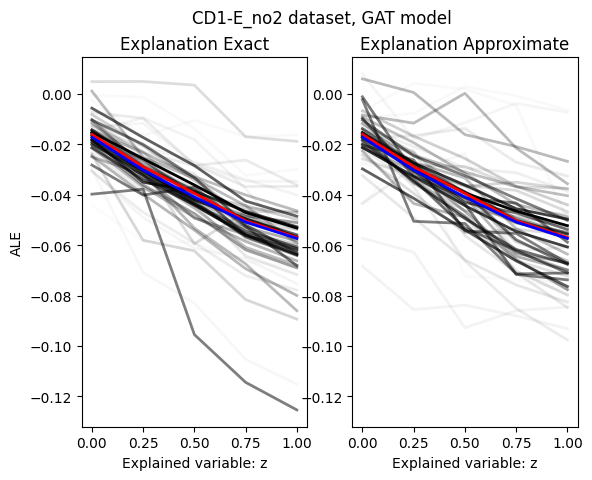

In [27]:
mod = df.apply(lambda x: x['k']*x['max_bin_size'], axis=1).sum()/5
gt = df.apply(lambda x: x['explanation_exact']*x['max_bin_size']*x['k']/mod,axis=1).groupby(['index']).sum()
#gt = df.groupby(['index']).mean()['explanation_exact']
ap = df.apply(lambda x: x['explanation_approximate']*x['max_bin_size']*x['k']/mod,axis=1).groupby(['index']).sum()#['explanation_approximate']
#print(np.vstack(df['explanation_exact'].apply(lambda x: np.array(x))).mean(axis=0))
#gt = df.loc[:, 'explanation_exact'].mean()
print(ap)
# df1024['trial'] = df1024.reset_index()['level_0'].apply(lambda x: math.floor(float(x)/5))
fig, (ax1, ax2) = plt.subplots(1, 2)
for (k, max_bin_size), group in (
    df.groupby(["k", "max_bin_size"])
):
    color_intensity = k + max_bin_size
    ax1.plot(
        group.reset_index()["index"].apply(lambda x: x / 4),
        group["explanation_exact"],
        label=f"k={k}, max_bin_size={max_bin_size}",
        color=(0, 0, 0, color_intensity / 2048),
        linewidth=2,
    )

    ax2.sharey(ax1)
    ax2.plot(
        group.reset_index()["index"].apply(lambda x: x / 4),
        group["explanation_approximate"],
        label=f"k={k}, max_bin_size={max_bin_size}",
        color=(0, 0, 0, color_intensity / 2048),
        linewidth=2,
    )

ax1.plot(
    [0, 0.25, 0.5, 0.75, 1],
    gt,
    color='red',
    linewidth=2,
)
ax2.plot(
    [0, 0.25, 0.5, 0.75, 1],
    gt,
    color='red',
    linewidth=2,
)
ax1.plot(
    [0, 0.25, 0.5, 0.75, 1],
    ap,
    color='blue',
    linewidth=2,
)
ax2.plot(
    [0, 0.25, 0.5, 0.75, 1],
    ap,
    color='blue',
    linewidth=2,
)

# Add labels and legend
ax1.set_title('Explanation Exact')
ax2.set_title('Explanation Approximate')
ax1.set_xlabel('Explained variable: z')
ax2.set_xlabel('Explained variable: z')
#TODO: Change to appropriate x-axis labelm dependent on the datset (in args)
ax1.set_ylabel('ALE')# TODO" change to method
#ax.set_yscale('log')
plt.suptitle(f'{dataset} dataset, {model} model')
# Show plot
#plt.show()
plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/CD1-E_no2/ALE_{model}_n_layers2_hidden_size256.png")#, format='eps')


There quite big effect, no matter k and max-binsize: difference between exact and approximate!
TODO: correct (probably on entropy) 10-10 GAT
Parameters impact: only on exact firstly!

Maybe try to calculate it for the whole graph? (exact) - current No.1
Then look at divergence from the exact full for different parameters. 


TODO:
- get test_results metrics on untrained
- get many metrics on validation
- Finish calculating for big enough on entropia
- Double check if the results aren't swaped

23.07.24: 
Status: Got goldstandard for everything (single)
Got explanations approximate for everything

Observations: both goldstandard and approximation differ vastly from earlier results. It is worrying. Especially difference in BT, where results were pretty straightforward. 
for GAT mouse there are outliers that go up.

Possible next steps: Recalculate approximation - does not take long. Is it seed? Did i set up seed previously?
Sort out double plot 
Do I average any if the curves? is it different when I don't do that?
How does my approximation 1024-1024 look like?

When I measure distance of exact computations from "gold standard", there is a clear dependence on max bin size for citations and almost none for k.




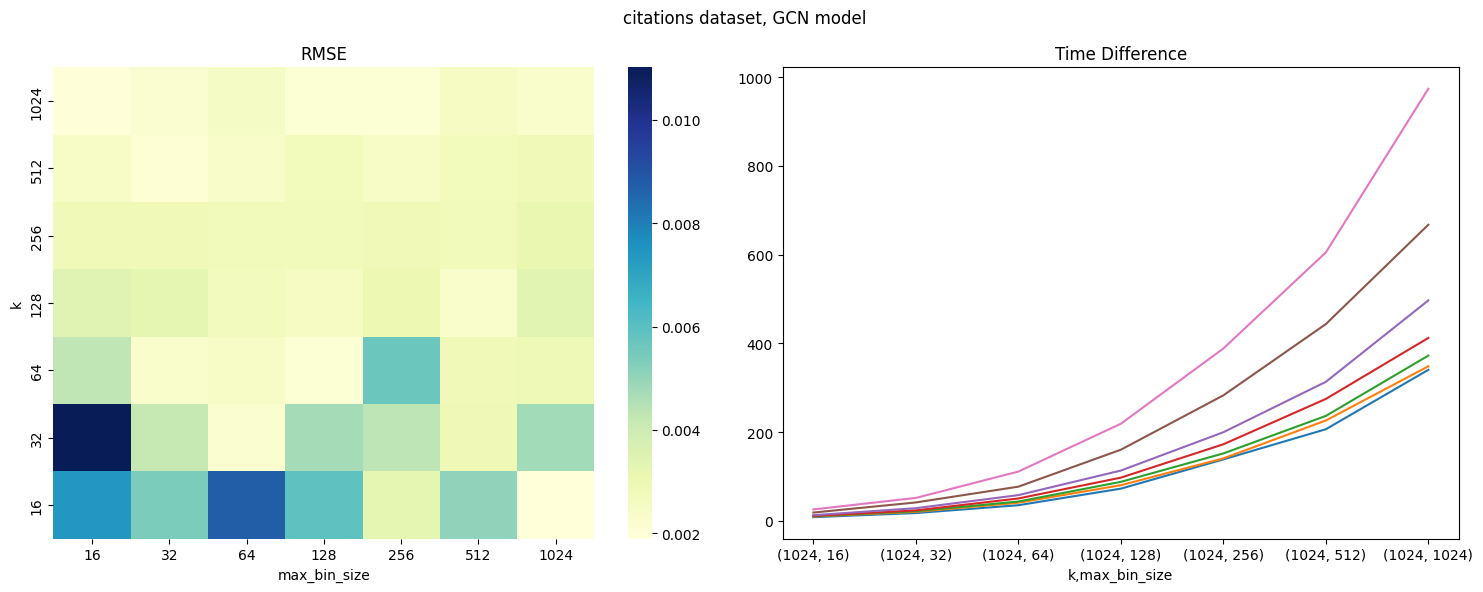

In [69]:
import numpy as np
def root_mean_squared_error(x,y):
    return np.sqrt(np.mean((np.array(x)-np.array(y))**2))
def R_squared(x,y):
    x = np.array(x)
    y = np.array(y)
    return 1 - np.sum((x-y)**2)/np.sum((x-np.mean(x))**2)
def plot_goldstandard(path, dataset, model):
    ALE = pd.read_csv(path, names=['i', 'k', 'max_bin_size',  'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact'], header=None, index_col=0).iloc[:245]
    mod = df.apply(lambda x: x['k']*x['max_bin_size'], axis=1).sum()/5
    goldstandard = ALE.apply(lambda x: x['explanation_exact']*x['max_bin_size']*x['k']/mod,axis=1).reset_index().groupby('i').sum()
    aggregated = ALE.groupby(['k','max_bin_size']).agg({'explanation_exact':list, 'time_exact':lambda x: list(x)[0],'explanation_approximate':list, 'time_approximate':lambda x: list(x)[0]})
    
    aggregated['wasserstein_distance'] = aggregated.apply(lambda row: root_mean_squared_error(goldstandard, row['explanation_approximate']),axis=1)
    aggregated['time_diff'] = aggregated['time_exact']-aggregated['time_approximate']
    results = aggregated.groupby(['k','max_bin_size']).agg({'wasserstein_distance':'mean', 'time_diff':'mean'})

    # Assuming 'results' is already defined and contains the necessary data
    # First heatmap for Wasserstein distance
    wasserstein_data = results['wasserstein_distance'].reset_index().pivot_table(values='wasserstein_distance', index='k', columns='max_bin_size')

    # Second heatmap for Time difference
    #time_data = results['time_diff'].reset_index().pivot_table(values='time_diff', index='k', columns='max_bin_size')

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # First heatmap
    sns.heatmap(wasserstein_data, annot=False, cmap='YlGnBu', ax=axes[0])
    axes[0].set_title('RMSE')
    axes[0].invert_yaxis()
    # Second heatmap
    #sns.heatmap(time_data, annot=False, cmap='YlGnBu', ax=axes[1])
    for k, group in results['time_diff'].groupby('k'):
        group.plot(kind='line', x='max_bin_size', y='time_diff', ax=axes[1])
    axes[1].set_title('Time Difference')
    #axes[1].set_yscale('log')
    fig.suptitle(f'{dataset} dataset, {model} model')
    # Adjust layout to prevent overlap
    plt.tight_layout()


    # Show the plot
    plt.show()

dataset="citations"
model="GCN"
plot_goldstandard(paths[f"{dataset} dataset, ALE method, {model} model"], dataset, model)

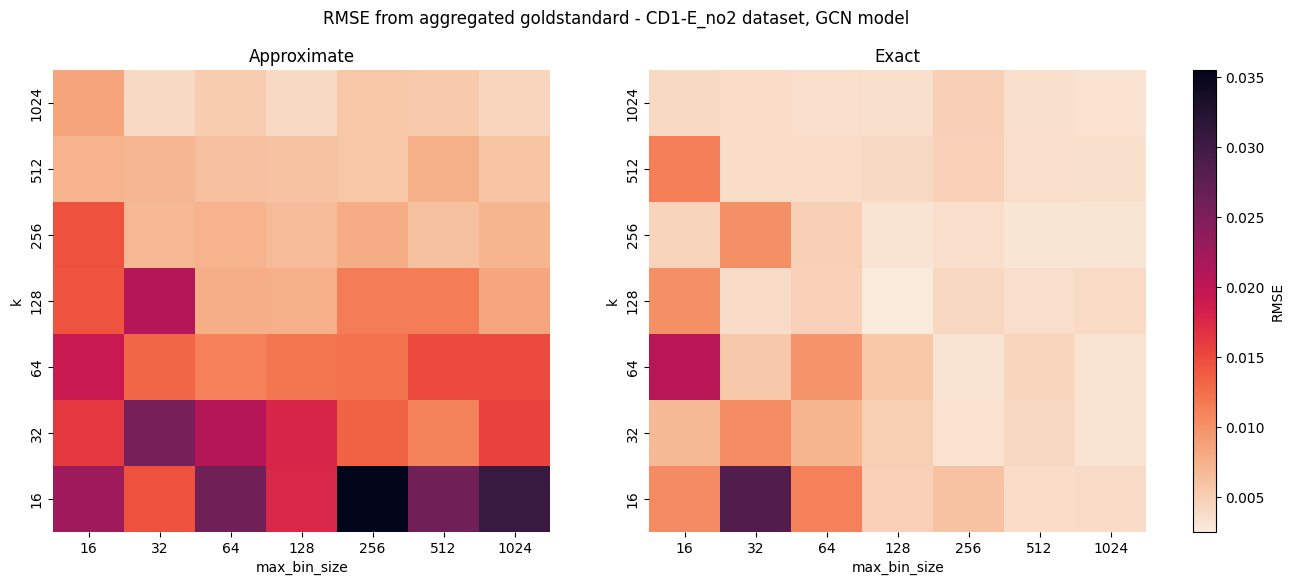

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def root_mean_squared_error(x, y):
    return np.sqrt(np.mean((np.array(x) - np.array(y))**2))

def R_squared(x, y):
    x = np.array(x)
    y = np.array(y)
    return 1 - np.sum((x - y)**2) / np.sum((x - np.mean(x))**2)

def plot_goldstandard(path, dataset, model):
    ALE = pd.read_csv(path, 
                      #names=['i', 'k', 'max_bin_size', 'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact'], 
                      #header=None, 
                      index_col=None).rename({"index":"i"}, axis=1)
    ALE['trial'] = [np.floor(i/5) for i in ALE.index]
    mod = ALE.apply(lambda x: x['k'] * x['max_bin_size'], axis=1).sum() / 5
    goldstandard = ALE.set_index('i').apply(lambda x: x['explanation_exact'] * x['max_bin_size'] * x['k'] / mod, axis=1).reset_index().groupby('i').sum()
    aggregated = ALE.groupby(['trial', 'k', 'max_bin_size']).agg({
        'explanation_exact': list,
        'time_exact': lambda x: list(x)[0],
        'explanation_approximate': list,
        'time_approximate': lambda x: list(x)[0]
    })
  
    aggregated['distance_approximate'] = aggregated.apply(lambda row: root_mean_squared_error(goldstandard, row['explanation_approximate']), axis=1)
    aggregated['distance_exact'] = aggregated.apply(lambda row: root_mean_squared_error(goldstandard, row['explanation_exact']), axis=1)
  
    results = aggregated.groupby(['k', 'max_bin_size']).agg({'distance_approximate': 'mean', 'distance_exact': 'mean'})
    approximate_data = results['distance_approximate'].reset_index().pivot_table(values='distance_approximate', index='k', columns='max_bin_size')
    exact_data = results['distance_exact'].reset_index().pivot_table(values='distance_exact', index='k', columns='max_bin_size')
  
    # Heatmap with common colormap, colorbar, and logarithmic scale
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Find common vmin and vmax, avoiding zero or negative values for log scale
    vmin = min(approximate_data[approximate_data > 0].min().min(), exact_data[exact_data > 0].min().min())
    vmax = max(approximate_data.max().max(), exact_data.max().max())
    
    # Define the colormap
    cmap = 'rocket_r'
    
    # Apply logarithmic normalization
    #norm = Norm(vmin=vmin, vmax=vmax)
    vmin = min(approximate_data.min().min(), exact_data.min().min())
    vmax = max(approximate_data.max().max(), exact_data.max().max())
    # Plot heatmaps with common logarithmic color range
    sns.heatmap(approximate_data, annot=False, cmap=cmap, vmin=vmin, vmax=vmax, ax=axes[0], cbar=False)
    axes[0].set_title('Approximate')
    axes[0].invert_yaxis()

    sns.heatmap(exact_data, annot=False, cmap=cmap, vmin=vmin, vmax=vmax, ax=axes[1], cbar=False)
    axes[1].set_title('Exact')
    axes[1].invert_yaxis()
    
    # Create a single colorbar for both heatmaps
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('RMSE')
    
    plt.suptitle(f'RMSE from aggregated goldstandard - {dataset} dataset, {model} model')
    plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/{dataset}/ALE_{model}_heatmap.eps", format='eps')
    plt.show()
# Example usage
dataset = "CD1-E_no2"
model = "GCN"
# plot_goldstandard('path_to_your_data.csv', dataset, "GCN")


plot_goldstandard(paths[f"{dataset} dataset, ALE method, {model} model"], dataset, model)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def root_mean_squared_error(x, y):
    return np.sqrt(np.mean((np.array(x) - np.array(y))**2))

def R_squared(x, y):
    x = np.array(x)
    y = np.array(y)
    return 1 - np.sum((x - y)**2) / np.sum((x - np.mean(x))**2)

def plot_goldstandard(path, dataset, model):
    ALE = pd.read_csv(path, 
                      names=['i', 'k', 'max_bin_size', 'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact'], 
                      header=None, index_col=None)
    ALE['trial'] = [np.floor(i/5) for i in ALE.index]
    mod = ALE.apply(lambda x: x['k'] * x['max_bin_size'], axis=1).sum() / 5
    goldstandard = ALE.set_index('i').apply(lambda x: x['explanation_exact'] * x['max_bin_size'] * x['k'] / mod, axis=1).reset_index().groupby('i').sum()
    aggregated = ALE.groupby(['trial', 'k', 'max_bin_size']).agg({
        'explanation_exact': list,
        'time_exact': lambda x: list(x)[0],
        'explanation_approximate': list,
        'time_approximate': lambda x: list(x)[0]
    })
  
    aggregated['distance_approximate'] = aggregated.apply(lambda row: root_mean_squared_error(goldstandard, row['explanation_approximate']), axis=1)
    aggregated['distance_exact'] = aggregated.apply(lambda row: root_mean_squared_error(goldstandard, row['explanation_exact']), axis=1)
  
    results = aggregated.groupby(['k', 'max_bin_size']).agg({'distance_approximate': 'mean', 'distance_exact': 'mean'})
    approximate_data = results['distance_approximate'].reset_index().pivot_table(values='distance_approximate', index='k', columns='max_bin_size')
    exact_data = results['distance_exact'].reset_index().pivot_table(values='distance_exact', index='k', columns='max_bin_size')
  
    # Heatmap with common colormap, colorbar, and logarithmic scale
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Find common vmin and vmax, avoiding zero or negative values for log scale
    vmin = min(approximate_data[approximate_data > 0].min().min(), exact_data[exact_data > 0].min().min())
    vmax = max(approximate_data.max().max(), exact_data.max().max())
    
    # Define the colormap
    cmap = 'rocket_r'
    
    # Apply logarithmic normalization
    norm = LogNorm(vmin=vmin, vmax=vmax)
    
    # Plot heatmaps with common logarithmic color range
    sns.heatmap(approximate_data, annot=False, cmap=cmap, norm=norm, ax=axes[0], cbar=False)
    axes[0].set_title('Approximate')
    axes[0].invert_yaxis()

    sns.heatmap(exact_data, annot=False, cmap=cmap, norm=norm, ax=axes[1], cbar=False)
    axes[1].set_title('Exact')
    axes[1].invert_yaxis()
    
    # Create a single colorbar for both heatmaps
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('RMSE')
    
    plt.suptitle(f'RMSE from aggregated goldstandard - {dataset} dataset, {model} model')
    plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/{dataset}/ALE_{model}_heatmap.eps", format='eps')
    plt.show()

# Example usage
dataset = "CD1-E_no2"
model = "GCN"
# plot_goldstandard('path_to_your_data.csv', dataset, "GCN")


plot_goldstandard(paths[f"{dataset} dataset, ALE method, {model} model"], dataset, model)

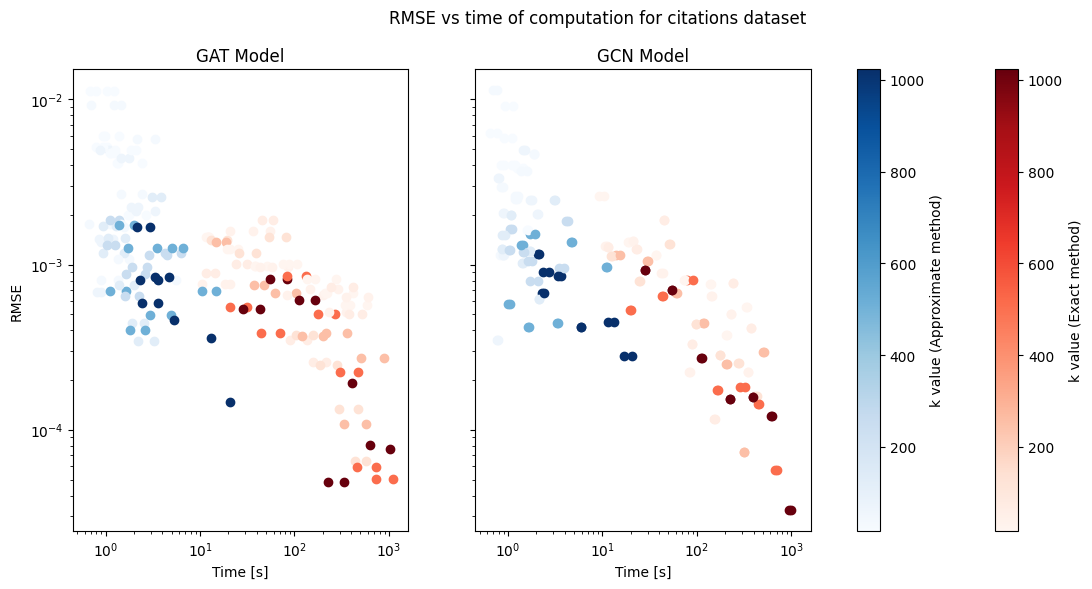

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import math

# Function to load data and compute necessary variables
def process_data(dataset, model, measure):
    df = pd.read_csv(paths[f"{dataset} dataset, ALE method, {model} model"],  
                     names=['i', 'k', 'max_bin_size',  'explanation_approximate', 'time_approximate', 
                            'explanation_exact', 'time_exact'], 
                     header=None, index_col=0)
    df['trial'] = [math.floor(x) for x in df.reset_index().index / 5]
    
    # Calculate mod and goldstandard
    mod = df.apply(lambda x: x['k'] * x['max_bin_size'], axis=1).sum() / 5
    goldstandard = df.apply(lambda x: x['explanation_exact'] * x['max_bin_size'] * x['k'] / mod, axis=1).reset_index().groupby('i').sum().values.T[0]
    
    # Aggregate the data
    aggregated = df.groupby(['trial']).agg({
        'k': lambda x: list(x)[0],
        'max_bin_size': lambda x: list(x)[0],
        'explanation_exact': list, 
        'time_exact': lambda x: list(x)[0],
        'explanation_approximate': list, 
        'time_approximate': lambda x: list(x)[0],
    })
    
    # Calculate distances
    aggregated['distance_exact'] = aggregated.apply(lambda row: measure(goldstandard, row['explanation_exact']), axis=1)
    aggregated['distance_approximate'] = aggregated.apply(lambda row: measure(goldstandard, row['explanation_approximate']), axis=1)
    
    return aggregated

# Set common parameters
dataset = "citations"
measure = root_mean_squared_error

# Load and process data for both models
aggregated_gat = process_data(dataset, "GAT", measure)
aggregated_gcn = process_data(dataset, "GCN", measure)

# Normalize the 'k' values for color mapping (common for both plots)
norm = Normalize(vmin=16, vmax=1024)

# Create colormaps for exact (red) and approximate (blue) dots
red_cmap = plt.cm.Reds
blue_cmap = plt.cm.Blues

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot for GAT
for _, row in aggregated_gat.iterrows():
    color = red_cmap(norm(row['k']))
    axs[0].scatter(x=row['time_exact'], y=row['distance_exact'], color=color)
for _, row in aggregated_gat.iterrows():
    color = blue_cmap(norm(row['k']))
    axs[0].scatter(x=row['time_approximate'], y=row['distance_approximate'], color=color)

axs[0].set_title("GAT Model")
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('RMSE')

# Plot for GCN
for _, row in aggregated_gcn.iterrows():
    color = red_cmap(norm(row['k']))
    axs[1].scatter(x=row['time_exact'], y=row['distance_exact'], color=color)
for _, row in aggregated_gcn.iterrows():
    color = blue_cmap(norm(row['k']))
    axs[1].scatter(x=row['time_approximate'], y=row['distance_approximate'], color=color)

axs[1].set_title("GCN Model")
axs[1].set_xlabel('Time [s]')

# Set logarithmic scale for both axes
for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')

# Add a common colorbar
sm_red = ScalarMappable(cmap=red_cmap, norm=norm)
sm_red.set_array([])
cbar_red = fig.colorbar(sm_red, ax=axs, orientation='vertical', pad=0.00)
cbar_red.set_label('k value (Exact method)')

sm_blue = ScalarMappable(cmap=blue_cmap, norm=norm)
sm_blue.set_array([])
cbar_blue = fig.colorbar(sm_blue, ax=axs, orientation='vertical', pad=0.05)
cbar_blue.set_label('k value (Approximate method)')

# Show the plot
plt.suptitle(f"RMSE vs time of computation for {dataset} dataset")
plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/citations/RMSE_vs_time.eps", format='eps')
plt.show()


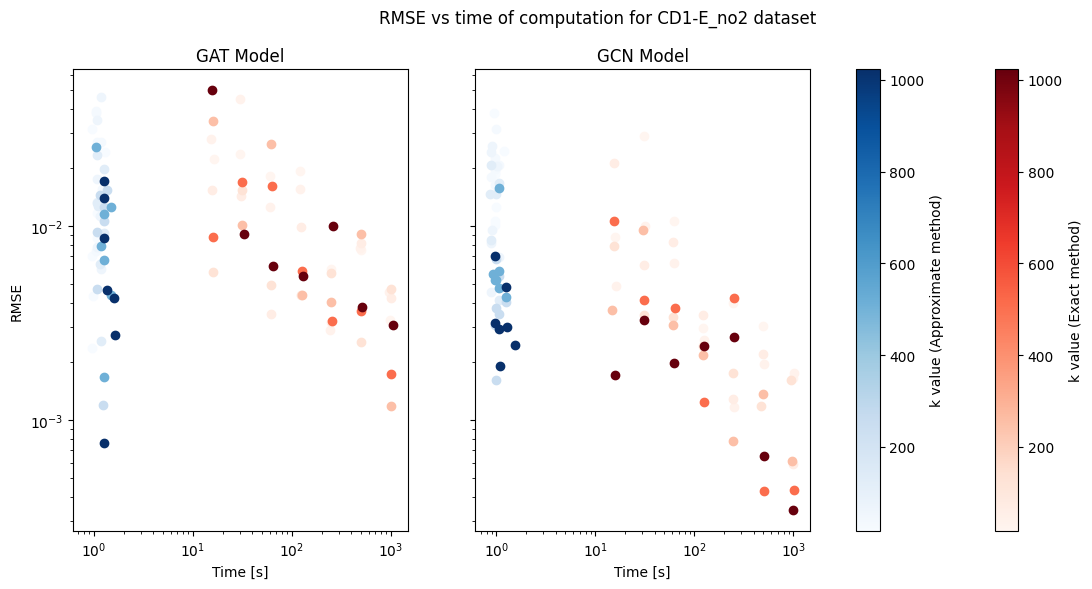

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import math

# Function to load data and compute necessary variables
def process_data(dataset, model, measure):
    df = pd.read_csv(paths[f"{dataset} dataset, ALE method, {model} model"],  
                     #names=['i', 'k', 'max_bin_size', 'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact'], 
                     #header=None, 
                     index_col=0)
    
    df = df.reset_index().rename({"index": 'i'}, axis=1).set_index('i')

    df['trial'] = [math.floor(x) for x in df.reset_index().index / 5]
    
    # Calculate mod and goldstandard
    mod = df.apply(lambda x: x['k'] * x['max_bin_size'], axis=1).sum() / 5
    goldstandard = df.apply(lambda x: x['explanation_exact'] * x['max_bin_size'] * x['k'] / mod, axis=1).reset_index().groupby('i').sum().values.T[0]
    
    # Aggregate the data
    aggregated = df.groupby(['trial']).agg({
        'k': lambda x: list(x)[0],
        'max_bin_size': lambda x: list(x)[0],
        'explanation_exact': list, 
        't_exact': lambda x: list(x)[0],
        'explanation_approximate': list, 
        't_approximate': lambda x: list(x)[0],
    })
    
    # Calculate distances
    aggregated['distance_exact'] = aggregated.apply(lambda row: measure(goldstandard, row['explanation_exact']), axis=1)
    aggregated['distance_approximate'] = aggregated.apply(lambda row: measure(goldstandard, row['explanation_approximate']), axis=1)
    
    return aggregated

# Set common parameters
dataset = "CD1-E_no2"
measure = root_mean_squared_error

# Load and process data for both models
aggregated_gat = process_data(dataset, "GAT", measure)
aggregated_gcn = process_data(dataset, "GCN", measure)

# Normalize the 'k' values for color mapping (common for both plots)
norm = Normalize(vmin=16, vmax=1024)

# Create colormaps for exact (red) and approximate (blue) dots
red_cmap = plt.cm.Reds
blue_cmap = plt.cm.Blues

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot for GAT
for _, row in aggregated_gat.iterrows():
    color = red_cmap(norm(row['k']))
    axs[0].scatter(x=row['t_exact'], y=row['distance_exact'], color=color)
for _, row in aggregated_gat.iterrows():
    color = blue_cmap(norm(row['k']))
    axs[0].scatter(x=row['t_approximate'], y=row['distance_approximate'], color=color)

axs[0].set_title("GAT Model")
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('RMSE')

# Plot for GCN
for _, row in aggregated_gcn.iterrows():
    color = red_cmap(norm(row['k']))
    axs[1].scatter(x=row['t_exact'], y=row['distance_exact'], color=color)
for _, row in aggregated_gcn.iterrows():
    color = blue_cmap(norm(row['k']))
    axs[1].scatter(x=row['t_approximate'], y=row['distance_approximate'], color=color)

axs[1].set_title("GCN Model")
axs[1].set_xlabel('Time [s]')

# Set logarithmic scale for both axes
for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')

# Add a common colorbar
sm_red = ScalarMappable(cmap=red_cmap, norm=norm)
sm_red.set_array([])
cbar_red = fig.colorbar(sm_red, ax=axs, orientation='vertical', pad=0.00)
cbar_red.set_label('k value (Exact method)')

sm_blue = ScalarMappable(cmap=blue_cmap, norm=norm)
sm_blue.set_array([])
cbar_blue = fig.colorbar(sm_blue, ax=axs, orientation='vertical', pad=0.05)
cbar_blue.set_label('k value (Approximate method)')

# Show the plot
plt.suptitle(f"RMSE vs time of computation for {dataset} dataset")
plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/CD1-E_no2/RMSE_vs_time.eps", format='eps')
plt.show()


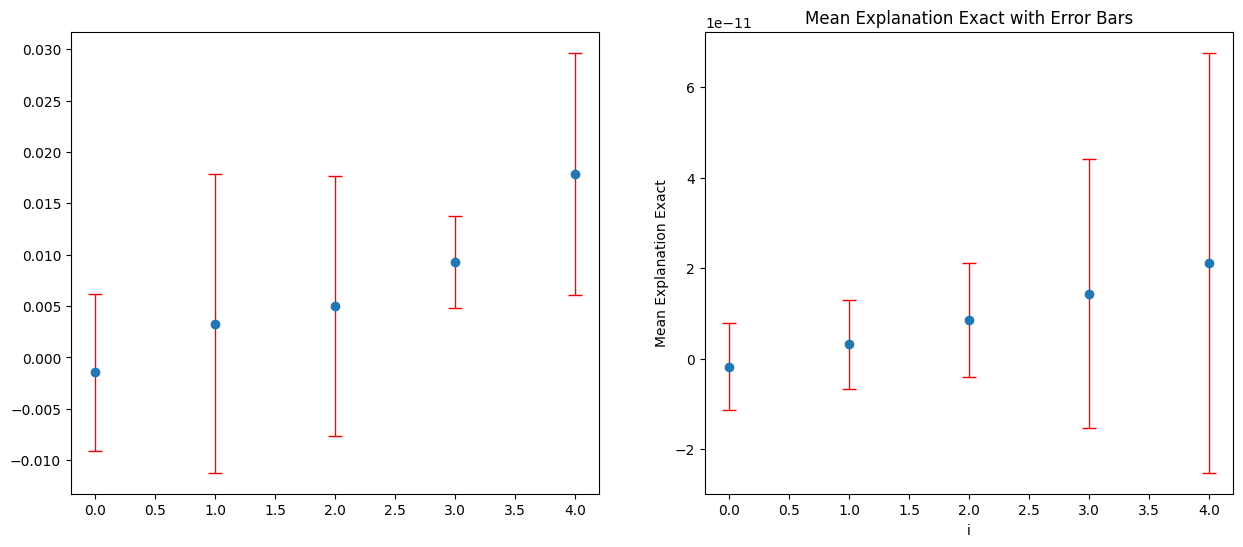

In [58]:
# gold standard with error bars?
grouped = ALE[(ALE.k==1024)&(ALE.max_bin_size==1024)].groupby('i')['explanation_exact'].agg(['mean', 'std']).reset_index()
grouped2 = ALE[(ALE.k==1024)&(ALE.max_bin_size==1024)].groupby('i')['explanation_approximate'].agg(['mean', 'std']).reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(grouped['i'], grouped['mean'], yerr=grouped['std'], fmt='o', ecolor='r', capsize=5, capthick=1, elinewidth=1)
ax2.errorbar(grouped2['i'], grouped2['mean'], yerr=grouped2['std'], fmt='o', ecolor='r', capsize=5, capthick=1, elinewidth=1)
plt.xlabel('i')
plt.ylabel('Mean Explanation Exact')
plt.title('Mean Explanation Exact with Error Bars')
plt.show()

In [64]:


def plot_heatmaps(path, dataset, model):
    ALE = pd.read_csv(path, names=['i', 'trial', 'k', 'max_bin_size', 'explanation_exact', 'time_exact', 'explanation_approximate', 'time_approximate'], header=None, index_col=None)
    
    aggregated = ALE.groupby(['k','max_bin_size', 'trial']).agg({'explanation_exact':list, 'time_exact':lambda x: list(x)[0],'explanation_approximate':list, 'time_approximate':lambda x: list(x)[0]})
    
    aggregated['wasserstein_distance'] = aggregated.apply(lambda row: root_mean_squared_error(row['explanation_exact'], row['explanation_approximate']),axis=1)
    aggregated['time_diff'] = aggregated['time_exact']-aggregated['time_approximate']
    results = aggregated.groupby(['k','max_bin_size']).agg({'wasserstein_distance':'mean', 'time_diff':'mean'})

    # Assuming 'results' is already defined and contains the necessary data
    # First heatmap for Wasserstein distance
    wasserstein_data = results['wasserstein_distance'].reset_index().pivot_table(values='wasserstein_distance', index='k', columns='max_bin_size')

    # Second heatmap for Time difference
    #time_data = results['time_diff'].reset_index().pivot_table(values='time_diff', index='k', columns='max_bin_size')

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # First heatmap
    sns.heatmap(wasserstein_data, annot=False, cmap='YlGnBu', ax=axes[0])
    axes[0].set_title('Wasserstein Distance')
    axes[0].invert_yaxis()
    # Second heatmap
    #sns.heatmap(time_data, annot=False, cmap='YlGnBu', ax=axes[1])
    for k, group in results['time_diff'].groupby('k'):
        group.plot(kind='line', x='max_bin_size', y='time_diff', ax=axes[1])
    axes[1].set_title('Time Difference')
    axes[1].set_yscale('log')
    fig.suptitle(f'{dataset} dataset, {model} model')
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

In [6]:
dataset="citations"
model="GCN"
plot_heatmaps(paths[f"{dataset} dataset, ALE, {model} model"], dataset, model)

NameError: name 'plot_heatmaps' is not defined

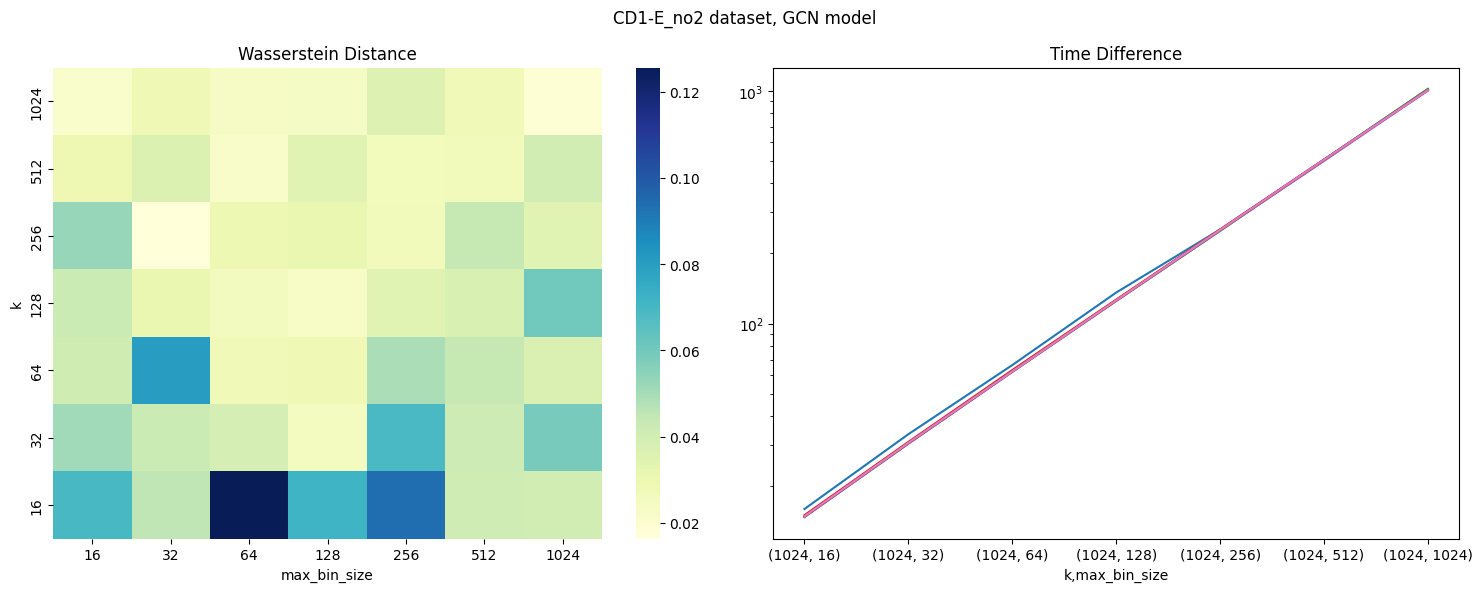

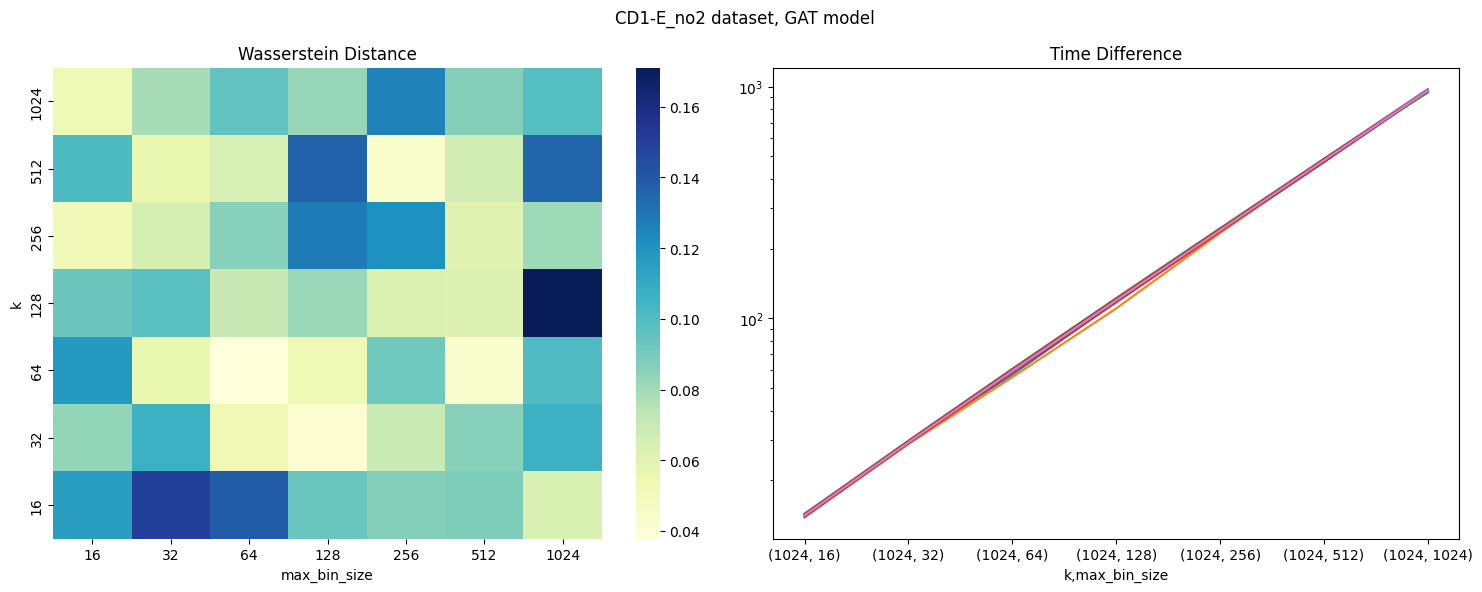

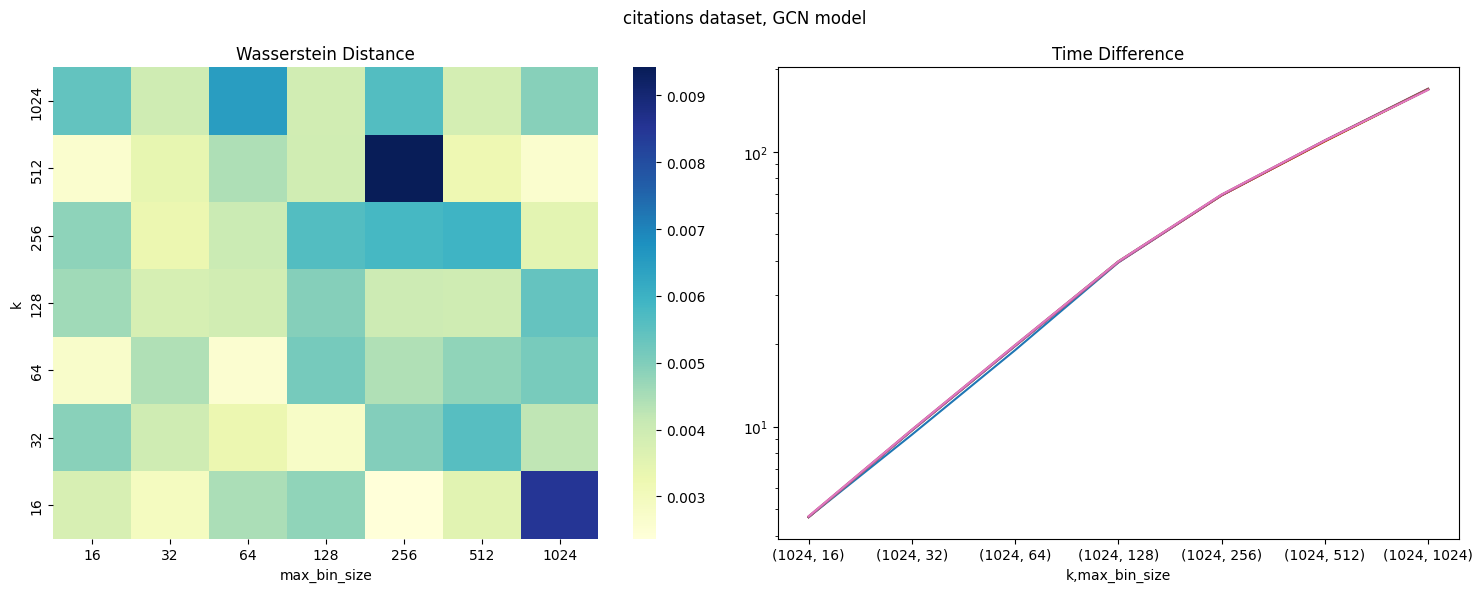

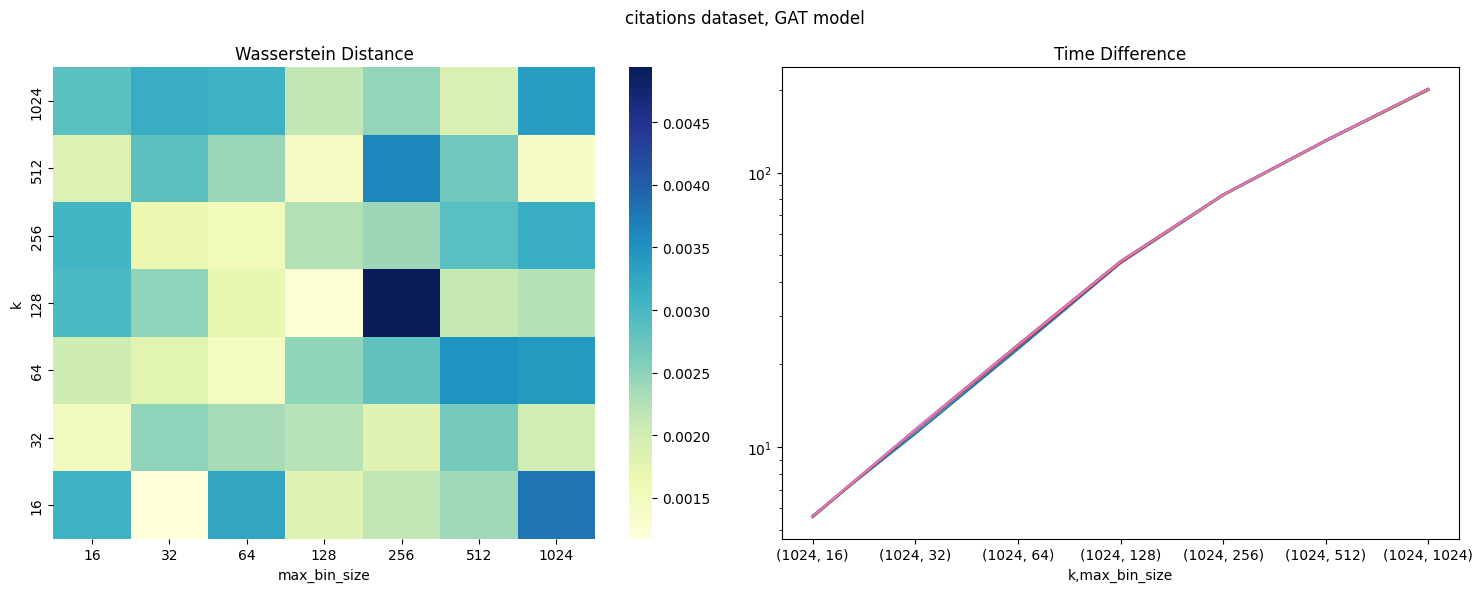

In [19]:

paths={}
for dataset in ["CD1-E_no2", "citations"]:
    for model in ["GCN", "GAT"]:
        if dataset == "citations":
            paths[f"{dataset} dataset, ALE, {model} model"] = f"C:/Users/ppaul/Documents/influence_on_ideas/data/{dataset}/ALE_{model}_n_layers4_hidden_size256.csv"
        else:
            paths[f"{dataset} dataset, ALE, {model} model"] = f"C:/Users/ppaul/Documents/influence_on_ideas/data/{dataset}/ALE_{model}_n_layers2_hidden_size256.csv"
        plot_heatmaps(paths[f"{dataset} dataset, ALE, {model} model"], dataset, model)



In [46]:
ALE.reset_index().groupby(['k', 'max_bin_size', 'index']).std()

trial  explanation_exact  time_exact  \
k      max_bin_size index                                            
16.0   16.0         0.0    1.581139           0.053541    0.525011   
                    1.0    1.581139           0.023577    0.525011   
                    2.0    1.581139           0.069449    0.525011   
                    3.0    1.581139           0.071880    0.525011   
                    4.0    1.581139           0.113702    0.525011   
...                             ...                ...         ...   
1024.0 1024.0       0.0    1.290994           0.007648    4.868716   
                    1.0    1.290994           0.014519    4.868716   
                    2.0    1.290994           0.012677    4.868716   
                    3.0    1.290994           0.004504    4.868716   
                    4.0    1.290994           0.011779    4.868716   

                           explanation_approximate  time_approximate  
k      max_bin_size index                                             
16.0   16.0         0.0               4.708978e-10          0.421091  
                    1.0               1.319051e-09          0.421091  
                    2.0               1.459523e-09          0.421091  
                    3.0               2.051782e-09          0.421091  
                    4.0               2.735326e-09          0.421091  
...                                            ...               ...  
1024.0 1024.0       0.0               9.594062e-12          0.010871  
                    1.0               9.829410e-12          0.010871  
                    2.0               1.255537e-11          0.010871  
                    3.0               2.976016e-11          0.010871  
                    4.0               4.639276e-11          0.010871  

[245 rows x 5 columns]

In [34]:
paths = {'CD1-E_no2 dataset, ALE, GCN model': 'C:/Users/ppaul/Documents/influence_on_ideas/data/CD1-E_no2/ALE_GCN_n_layers2_hidden_size256.csv',
 'CD1-E_no2 dataset, ALE, GAT model': 'C:/Users/ppaul/Documents/influence_on_ideas/data/CD1-E_no2/ALE_GAT_n_layers2_hidden_size256.csv',
 'citations dataset, ALE, GCN model': 'C:/Users/ppaul/Documents/influence_on_ideas/data/citations/ALE_04.08_GCN_n_layers2_hidden_size256.csv',
 'citations dataset, ALE, GAT model': 'C:/Users/ppaul/Documents/influence_on_ideas/data/citations/ALE_04.08_GAT_n_layers2_hidden_size256.csv'}

In [56]:
ALE

,i,k,max_bin_size,explanation_exact,time_exact,explanation_approximate,time_approximate
0,0.00,16,16,0.000573,0.650732,0.002581,9.113714
1,0.25,16,16,0.008293,0.650732,0.002750,9.113714
2,0.50,16,16,0.010687,0.650732,0.002782,9.113714
3,0.75,16,16,0.010687,0.650732,0.002782,9.113714
4,1.00,16,16,0.015713,0.650732,0.001162,9.113714
...,...,...,...,...,...,...,...
485,0.00,1024,1024,0.001680,20.502762,0.001449,946.269917
486,0.25,1024,1024,0.003221,20.502762,0.002722,946.269917
487,0.50,1024,1024,0.004817,20.502762,0.004535,946.269917
488,0.75,1024,1024,0.004817,20.502762,0.004535,946.269917


<Axes: title={'center': 'explanation_approximate'}, xlabel='[i]'>

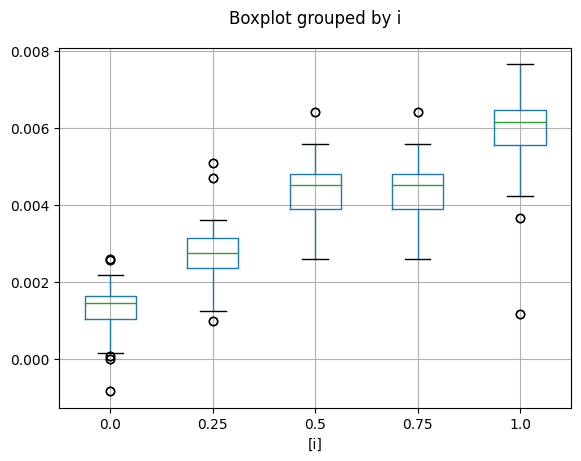

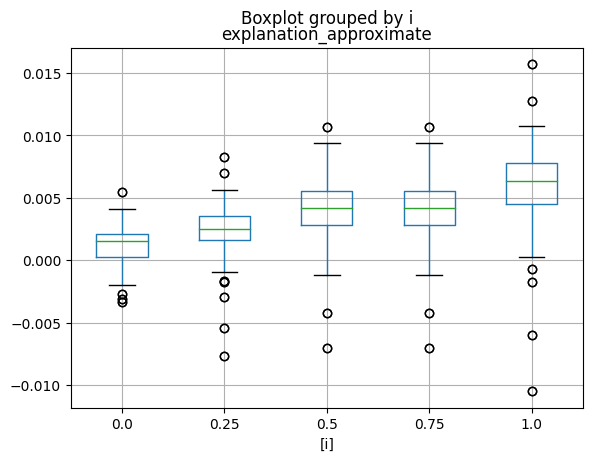

In [57]:
ALE = pd.read_csv(paths['citations dataset, ALE, GCN model'], names=['i', 'k', 'max_bin_size', 'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact',], header=None, index_col=None)
ALE['i'] = ALE['i'].apply(lambda x: x/4)
ALE.boxplot(column=['explanation_exact'], by=['i'])
plt.title('')
ALE.boxplot(column=['explanation_approximate'], by=['i'])



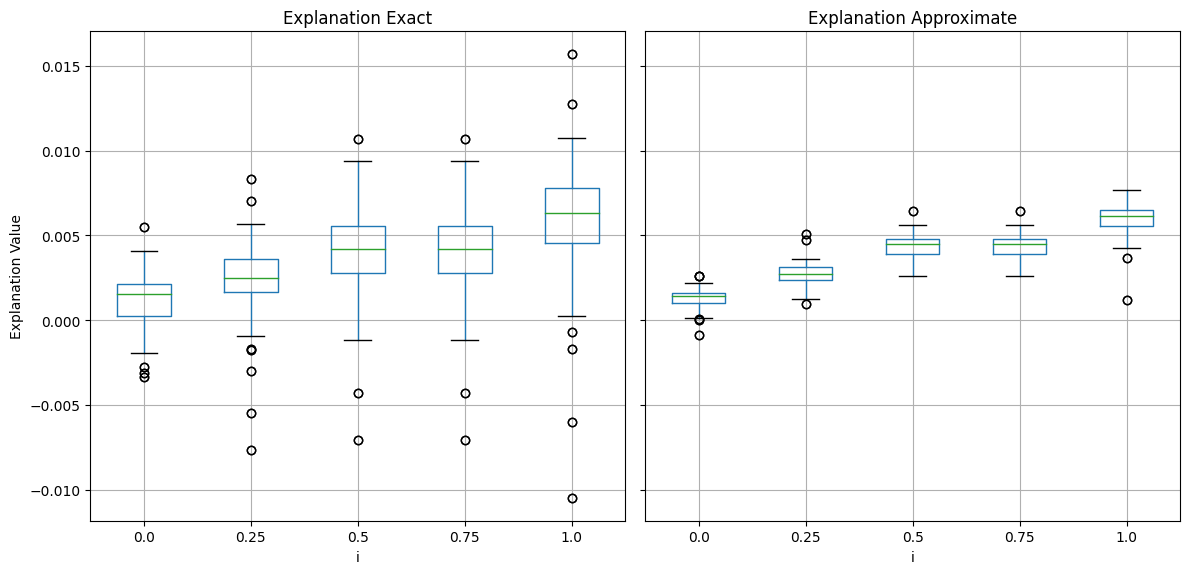

In [47]:
def plot_boxplots(df, group_by_column):
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
    
    # Boxplot for 'explanation_exact'
    df.boxplot(column=['explanation_exact'], by=group_by_column, ax=axes[0])
    axes[0].set_title('Explanation Exact')
    axes[0].set_xlabel(group_by_column)
    axes[0].set_ylabel('Explanation Value')
    
    # Boxplot for 'explanation_approximate'
    df.boxplot(column=['explanation_approximate'], by=group_by_column, ax=axes[1])
    axes[1].set_title('Explanation Approximate')
    axes[1].set_xlabel(group_by_column)
    
    # Adjust the layout and remove the automatic title that pandas adds
    plt.suptitle('')
    plt.tight_layout()
    
    # Show the plot
    plt.show()


# Call the function
plot_boxplots(ALE, 'i')

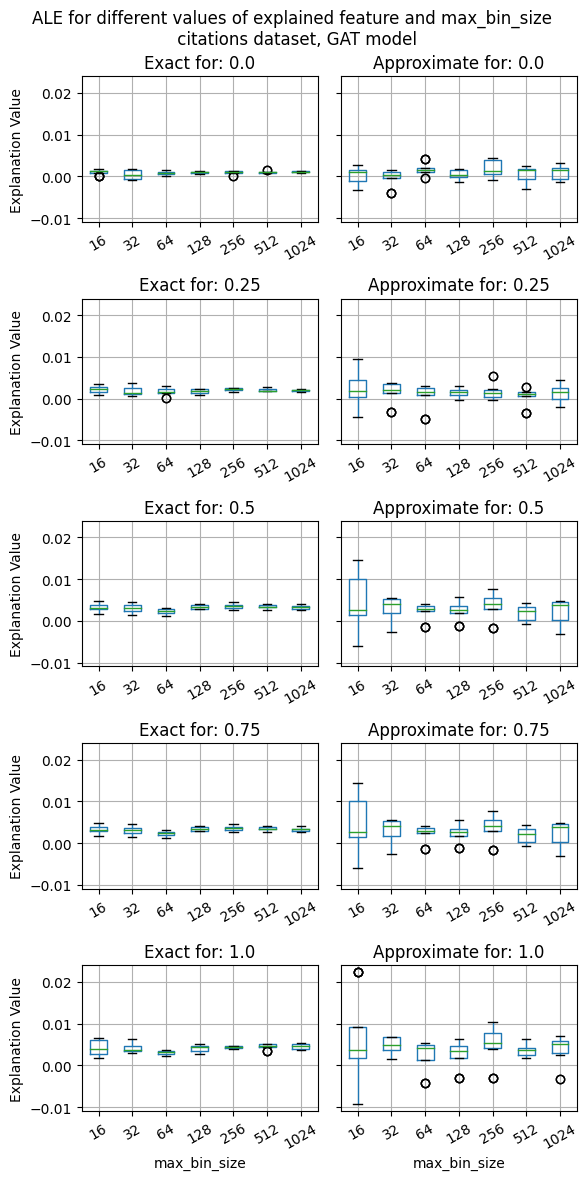

In [194]:
def plot_boxplots_k(df, col):
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(6, 12), sharey=True)
    
    for i in range(5):
        # Boxplot for 'explanation_exact'
        df[df['i']==i/4].boxplot(column=['explanation_exact'], by=col, ax=axes[i,0])
        axes[i,0].set_title('Exact for: '+str(i/4))
        if i==4:
            axes[i,0].set_xlabel(col)
        else:     
            axes[i,0].set(xlabel=None)        
        axes[i,0].tick_params(axis='x', rotation=30)
        axes[i, 0].set_ylabel('Explanation Value')

        
        # Boxplot for 'explanation_approximate'
        df[df['i']==i/4].boxplot(column=['explanation_approximate'], by=col, ax=axes[i,1])
        axes[i,1].set_title('Approximate for: '+str(i/4))
        if i==4:
            axes[i,1].set_xlabel(col) 
        else:     
            axes[i,1].set(xlabel=None)
        axes[i,1].tick_params(axis='x', rotation=30)
    
    # Adjust the layout and remove the automatic title that pandas adds
    #plt.suptitle('')
    plt.suptitle(f"ALE for different values of explained feature and {col} \n {dataset} dataset, {model} model")
    plt.tight_layout()
    plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/{dataset}/boxplot_{col}_{dataset}_{model}.eps", format='eps')
    # Show the plot
    plt.show()


# Call the function
dataset="citations"#"CD1-E_no2"#
model = "GAT"
ALE = pd.read_csv(paths[f"{dataset} dataset, ALE method, {model} model"], names=['i', 'k', 'max_bin_size', 'explanation_approximate', 'time_approximate', 'explanation_exact', 'time_exact',], header=None, index_col=None)
ALE['i'] = ALE['i'].apply(lambda x: x/4)
plot_boxplots_k(ALE, 'max_bin_size')

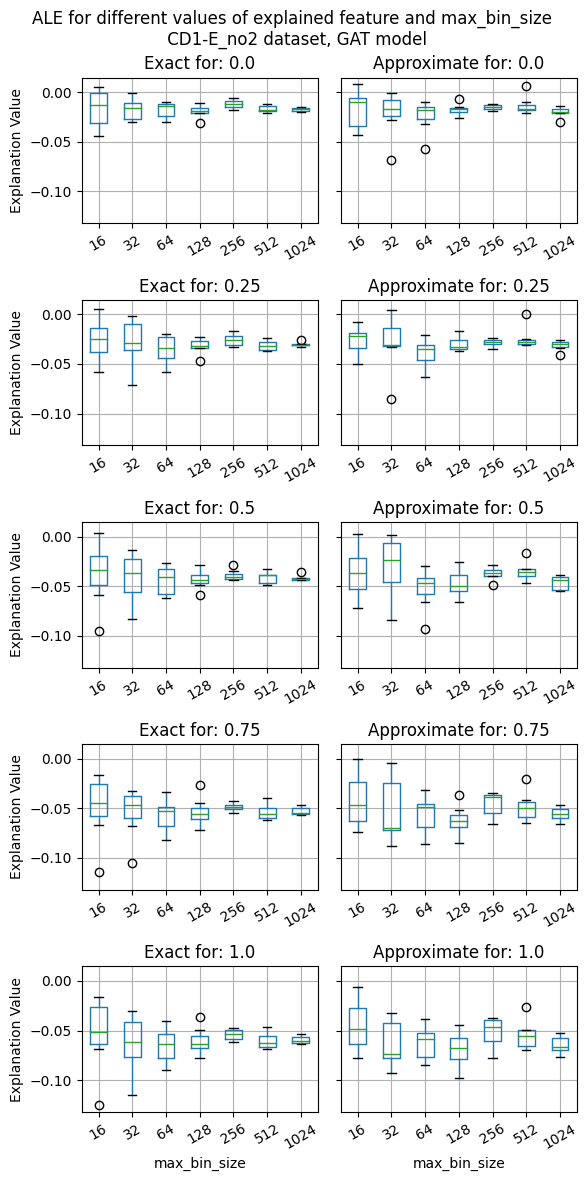

In [195]:
def plot_boxplots_k(df, col):
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(6, 12), sharey=True)
    
    for i in range(5):
        # Boxplot for 'explanation_exact'
        df[df['i']==i/4].boxplot(column=['explanation_exact'], by=col, ax=axes[i,0])
        axes[i,0].set_title('Exact for: '+str(i/4))
        if i==4:
            axes[i,0].set_xlabel(col)
        else:     
            axes[i,0].set(xlabel=None)        
        axes[i,0].tick_params(axis='x', rotation=30)
        axes[i, 0].set_ylabel('Explanation Value')

        
        # Boxplot for 'explanation_approximate'
        df[df['i']==i/4].boxplot(column=['explanation_approximate'], by=col, ax=axes[i,1])
        axes[i,1].set_title('Approximate for: '+str(i/4))
        if i==4:
            axes[i,1].set_xlabel(col) 
        else:     
            axes[i,1].set(xlabel=None)
        axes[i,1].tick_params(axis='x', rotation=30)
    
    # Adjust the layout and remove the automatic title that pandas adds
    #plt.suptitle('')
    plt.suptitle(f"ALE for different values of explained feature and {col} \n {dataset} dataset, {model} model")
    plt.tight_layout()
    plt.savefig(f"C:/Users/ppaul/Documents/influence_on_ideas/figures/{dataset}/boxplot_{col}_{dataset}_{model}.eps", format='eps')
    # Show the plot
    plt.show()


# Call the function
dataset="CD1-E_no2"#"citations"
model = "GAT"
ALE = pd.read_csv(paths[f"{dataset} dataset, ALE method, {model} model"], index_col=None).rename({"index":"i"},axis=1)
ALE['i'] = ALE['i'].apply(lambda x: x/4)
plot_boxplots_k(ALE, 'max_bin_size')

<Axes: title={'center': 'explanation_approximate'}, xlabel='[k]'>

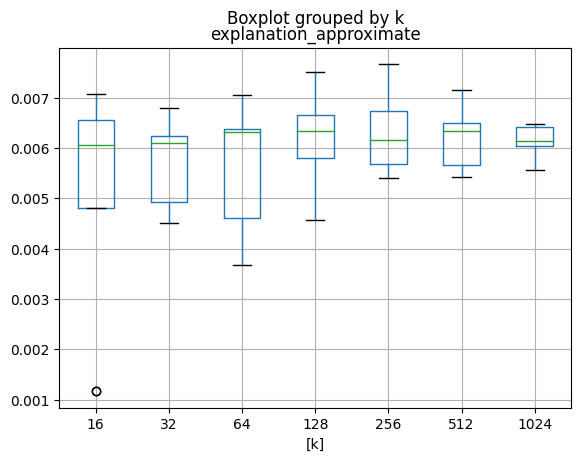

In [45]:
ALE[ALE['i']==1].boxplot(column=['explanation_approximate'], by=['k'])

<Axes: title={'center': 'explanation_approximate'}, xlabel='[max_bin_size]'>

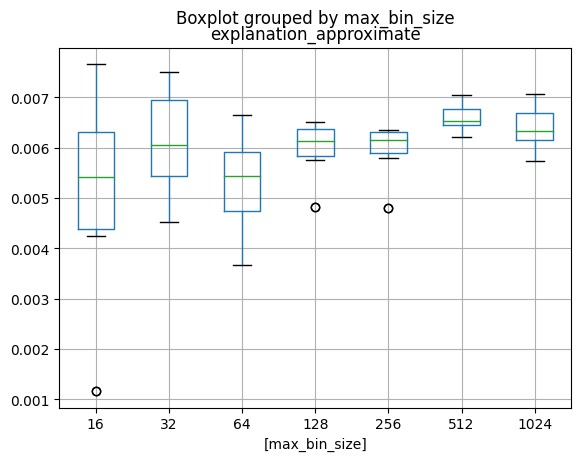

In [46]:
ALE[ALE['i']==1].boxplot(column=['explanation_approximate'], by=['max_bin_size'])

<Axes: title={'center': 'explanation_exact'}, xlabel='[k]'>

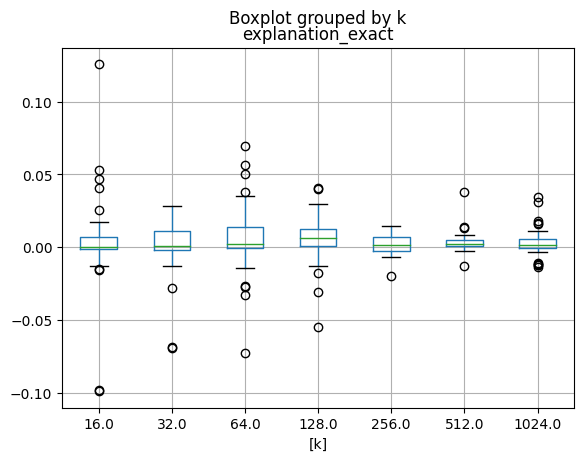

In [25]:
ALE[ALE['i']==0].boxplot(column=['explanation_exact'], by=['k'])

<Axes: title={'center': 'explanation_exact'}, xlabel='[max_bin_size]'>

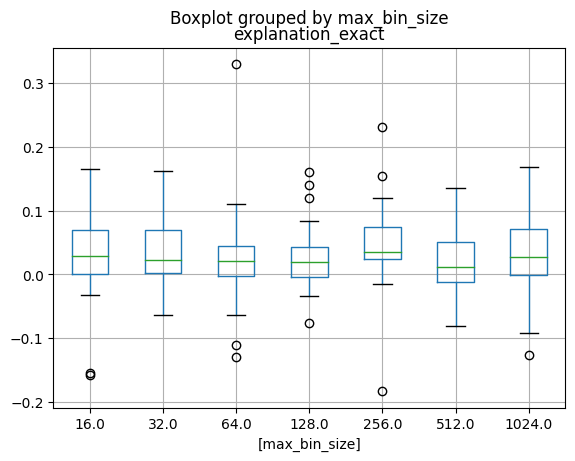

In [27]:
ALE[ALE['i']==4].boxplot(column=['explanation_exact'], by=['max_bin_size'])

In [ ]:
ALE.boxplot(column=['explanation_approximate'], by=['i'])

In [ ]:
#TODO: divergnce. boxblots for each explanation, model, dataset. 
def plot_boxplots(path, dataset, model):
    ALE = pd.read_csv(path, names=['trial', 'k', 'max_bin_size', 'explanation_exact', 'time_exact', 'explanation_approximate', 'time_approximate'], header=None, index_col=0)
    aggregated = ALE.groupby(['k','max_bin_size', 'trial']).agg({'explanation_exact':list, 'time_exact':lambda x: list(x)[0],'explanation_approximate':list, 'time_approximate':lambda x: list(x)[0]})
    aggregated['wasserstein_distance'] = aggregated.apply(lambda row: wasserstein_distance(row['explanation_exact'], row['explanation_approximate']),axis=1)
    aggregated['time_diff'] = aggregated['time_exact']-aggregated['time_approximate']
    results = aggregated.groupby(['k','max_bin_size']).agg({'wasserstein_distance':'mean', 'time_diff':'mean'})

    # Assuming 'results' is already defined and contains the necessary data
    # First heatmap for Wasserstein distance
    wasserstein_data = results['wasserstein_distance'].reset_index().pivot_table(values='wasserstein_distance', index='k', columns='max_bin_size')

    # Second heatmap for Time difference
    #time_data = results['time_diff'].reset_index().pivot_table(values='time_diff', index='k', columns='max_bin_size')

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # First heatmap
    sns.heatmap(wasserstein_data, annot=False, cmap='YlGnBu', ax=axes[0])
    axes[0].set_title('Wasserstein Distance')
    axes[0].invert_yaxis()
    # Second heatmap
    #sns.heatmap(time_data, annot=False, cmap='YlGnBu', ax=axes[1])
    results['time_diff'].groupby('k').plot(kind='line', x='max_bin_size', y='time_diff', ax=axes[1])
    axes[1].set_title('Time Difference')
    fig.suptitle(f'{dataset} dataset, {model} model')
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()
paths={}
for key, path in paths.items():
    plot_boxplots(paths[f"{dataset} dataset, ALE, {model} model"], dataset, model)



In [270]:
df

,index,trial,k,max_bin_size,explanation_exact,time_exact,explanation_approximate,time_approximate
0,0,16,16,0.000573,0.650732,0.002581,9.113714,NaN
1,1,16,16,0.008293,0.650732,0.002750,9.113714,NaN
2,2,16,16,0.010687,0.650732,0.002782,9.113714,NaN
3,3,16,16,0.010687,0.650732,0.002782,9.113714,NaN
4,4,16,16,0.015713,0.650732,0.001162,9.113714,NaN
...,...,...,...,...,...,...,...,...
485,0,1024,1024,0.001680,20.502762,0.001449,946.269917,NaN
486,1,1024,1024,0.003221,20.502762,0.002722,946.269917,NaN
487,2,1024,1024,0.004817,20.502762,0.004535,946.269917,NaN
488,3,1024,1024,0.004817,20.502762,0.004535,946.269917,NaN


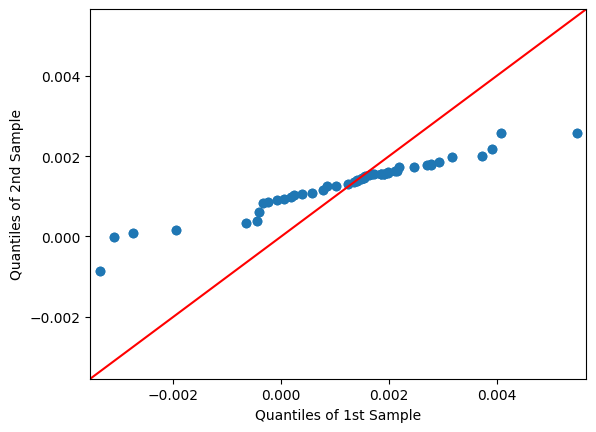

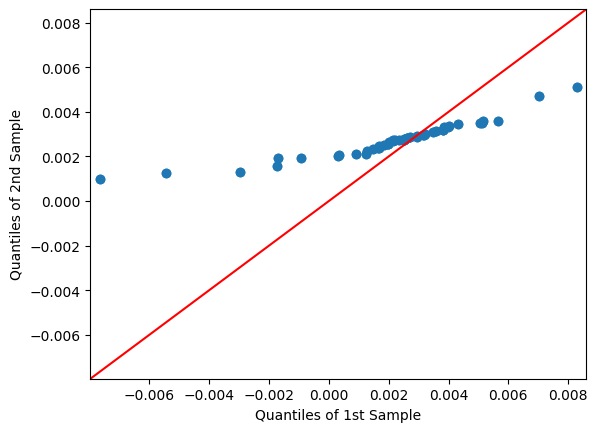

In [278]:
model = "GCN"
dataset = "citations"#"CD1-E_no2"#
df = pd.read_csv(
    paths[f"{dataset} dataset, ALE method, {model} model"],
    names=['index', 'k', 'max_bin_size', 'explanation_exact', 'time_exact', 'explanation_approximate', 'time_approximate'],
    header=None,
    index_col=None,
)

import numpy as np
import statsmodels as sm
import pylab

sm.graphics.gofplots.qqplot_2samples(df[df['index']==0]['explanation_exact'], df[df['index']==0]['explanation_approximate'], xlabel=None, ylabel=None, line="45", ax=None)
sm.graphics.gofplots.qqplot_2samples(df[df['index']==1]['explanation_exact'], df[df['index']==1]['explanation_approximate'], xlabel=None, ylabel=None, line="45", ax=None)
plt.show()


In [268]:
df[df['index']==0]['explanation_approximate']

0        9.113714
5       18.637107
10      36.499109
15      73.835008
20     139.783448
          ...    
465    111.431129
470    225.475490
475    390.384033
480    630.725065
485    946.269917
Name: explanation_approximate, Length: 98, dtype: float64